<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Working_on_a_Classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

In [2]:
df = pd.read_csv("/content/Classification.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-0.943804,-1.535591,-0.868449,0.906527,1.384669,0
1,-0.569422,-1.728071,1.577765,0.429032,-0.572671,0
2,0.474832,0.038195,1.302150,0.372536,1.389770,1
3,-0.231766,0.288572,-0.187394,0.065478,0.589935,0
4,0.139822,-0.941672,0.643508,0.026362,-1.059812,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  10040 non-null  float64
 1   Feature2  10040 non-null  float64
 2   Feature3  10040 non-null  float64
 3   Feature4  10040 non-null  float64
 4   Feature5  10040 non-null  float64
 5   y         10040 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 470.8 KB


In [4]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
count,10040.000000,10040.000000,10040.000000,10040.000000,10040.000000,10040.000000
mean,0.009862,-0.394473,0.001829,0.135774,0.005672,0.302092
std,1.012810,1.128283,1.007200,0.530758,1.279522,0.459188
min,-3.885011,-3.669607,-4.091459,-2.098975,-4.646553,0.000000
25%,-0.678882,-1.112280,-0.676546,-0.106092,-0.996410,0.000000
50%,0.001583,-0.835324,0.007485,0.144938,0.134859,0.000000
75%,0.696848,0.310284,0.671919,0.501733,1.037731,1.000000
max,4.258632,4.653068,4.333878,1.594813,3.655019,1.000000


In [5]:
df.dtypes

Feature1    float64
Feature2    float64
Feature3    float64
Feature4    float64
Feature5    float64
y             int64
dtype: object

In [6]:
df.shape

(10040, 6)

In [7]:
df.nunique()

Feature1    10040
Feature2    10040
Feature3    10040
Feature4    10040
Feature5    10040
y               2
dtype: int64

In [8]:
df.isnull().value_counts()

Feature1  Feature2  Feature3  Feature4  Feature5  y    
False     False     False     False     False     False    10040
dtype: int64

In [9]:
df.dropna()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-0.943804,-1.535591,-0.868449,0.906527,1.384669,0
1,-0.569422,-1.728071,1.577765,0.429032,-0.572671,0
2,0.474832,0.038195,1.302150,0.372536,1.389770,1
3,-0.231766,0.288572,-0.187394,0.065478,0.589935,0
4,0.139822,-0.941672,0.643508,0.026362,-1.059812,0
...,...,...,...,...,...,...
10035,-0.337200,-0.859267,-0.557877,-0.001806,-1.060293,0
10036,0.926521,-1.161851,-0.450585,0.007457,-1.397983,0
10037,-1.728677,-1.147471,-0.720349,-0.059687,-1.622389,0
10038,0.216306,-1.661369,2.218604,0.942063,1.358522,0


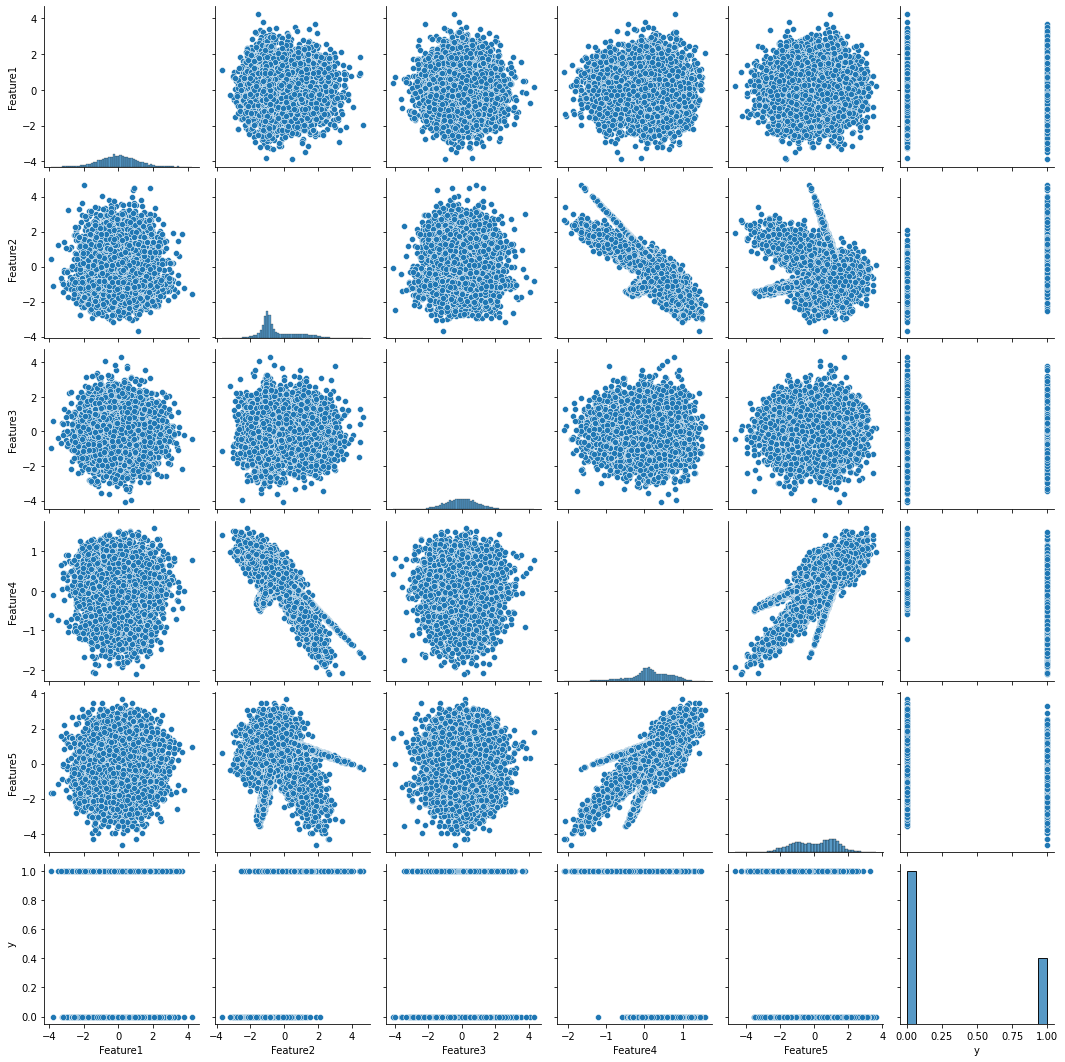

In [10]:
sns.pairplot(df)

In [11]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76a8e4ef50>,
      dtype=object)

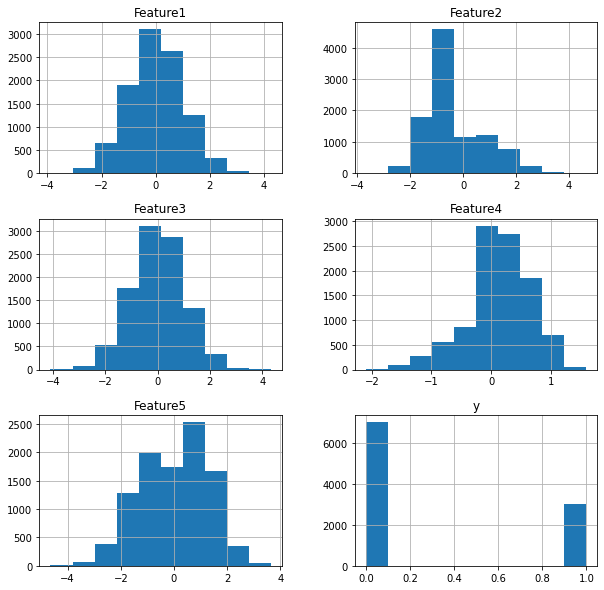

In [12]:
df.hist(figsize=(10,10))

In [13]:
df.max()

Feature1    4.258632
Feature2    4.653068
Feature3    4.333878
Feature4    1.594813
Feature5    3.655019
y           1.000000
dtype: float64

In [14]:
df.min()

Feature1   -3.885011
Feature2   -3.669607
Feature3   -4.091459
Feature4   -2.098975
Feature5   -4.646553
y           0.000000
dtype: float64

In [15]:
df.max() - df.min()

Feature1    8.143643
Feature2    8.322674
Feature3    8.425337
Feature4    3.693789
Feature5    8.301573
y           1.000000
dtype: float64

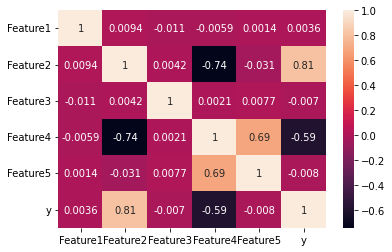

In [16]:
dfcor = df.corr()
sns.heatmap(dfcor,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76a72739d0>,
      dtype=object)

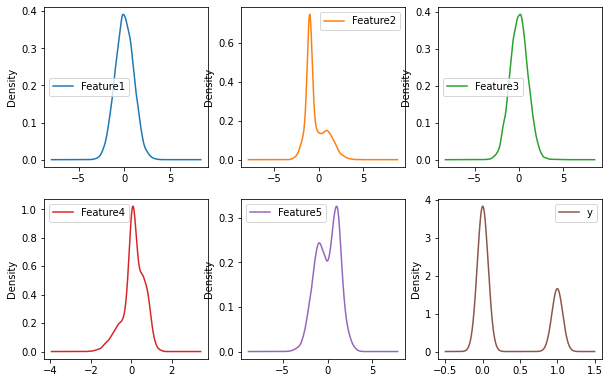

In [17]:
df.plot(kind="kde",subplots=True, layout=(3,3), sharex=False, figsize=(10,10))

In [18]:
x = df.drop(['y'],axis=1)
y = df['y']

ss = pp.StandardScaler()
x.iloc[:,:] = ss.fit_transform(x.iloc[:,:])

In [19]:
xtr, xte, ytr, yte = model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.svm import SVC
svc = SVC()

In [21]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21,2))
param1 = dict(n_neighbors = k_range)
grid1 = GridSearchCV(knn,param1,cv=10,scoring='accuracy')

e_range = list(range(100,500,100))
param2 = dict(n_estimators = e_range)
grid2 = GridSearchCV(rf,param2,cv=10,scoring='accuracy')

In [22]:
grid1.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [23]:
grid2.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [24]:
print(grid1.best_score_)
print(grid1.best_params_)
print(grid2.best_score_)
print(grid2.best_params_)

0.9444223107569721
{'n_neighbors': 11}
0.9559760956175298
{'n_estimators': 400}


In [28]:
lr.fit(xtr,ytr)
ylr = lr.predict(xte)

dt.fit(xtr,ytr)
ydt = dt.predict(xte)

rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(xtr,ytr)
yrf = rfc.predict(xte)

knnc = KNeighborsClassifier(n_neighbors = 11)
knnc.fit(xtr,ytr)
yknn = knnc.predict(xte)

svc.fit(xtr,ytr)
ysvc = svc.predict(xte)

In [29]:
print(metrics.accuracy_score(yte,ylr))
print(metrics.accuracy_score(yte,ydt))
print(metrics.accuracy_score(yte,yrf))
print(metrics.accuracy_score(yte,yknn))
print(metrics.accuracy_score(yte,ysvc))

0.9267928286852589
0.9342629482071713
0.9482071713147411
0.9352589641434262
0.9352589641434262


In [30]:
print(metrics.classification_report(yte,ylr))
print("*"*50)
print(metrics.classification_report(yte,ydt))
print("*"*50)
print(metrics.classification_report(yte,yrf))
print("*"*50)
print(metrics.classification_report(yte,yknn))
print("*"*50)
print(metrics.classification_report(yte,ysvc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1377
           1       0.90      0.86      0.88       631

    accuracy                           0.93      2008
   macro avg       0.92      0.91      0.91      2008
weighted avg       0.93      0.93      0.93      2008

**************************************************
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1377
           1       0.90      0.89      0.90       631

    accuracy                           0.93      2008
   macro avg       0.92      0.92      0.92      2008
weighted avg       0.93      0.93      0.93      2008

**************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1377
           1       0.92      0.91      0.92       631

    accuracy                           0.95      2008
   macro avg       0.94   